In [69]:
import glob
import os

#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

%matplotlib widget

In [15]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [16]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20221017_Lab'
subfolder = glob.glob(cwd + '/**')
subfolder.sort()
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20221017_Lab/01 CsPb_6mM_Br_12mM
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20221017_Lab/02 CsPb_6mM_Br_12mM_newTube
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20221017_Lab/03 CsPb_6mM_Br_12mM_sapphire
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20221017_Lab/04 CsPb_6mM_Br_12mM_TolOA
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20221017_Lab/05 CsPb_6mM_Br_12mM_TolOA_newTube
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20221017_Lab/06 CsPb_6mM_Br_12mM_TolOA_sapphire
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_

In [78]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

title = ['Insitu No dilute PTFE',
         'Insitu No dilute fresh PTFE', 
         'Insitu No dilute sapphire',  
         'Insitu 2-times dilute PTFE', 
         'Insitu 2-times dilute fresh PTFE', 
         'Insitu 2-times dilute sapphire', 
         'Ex situ 3-times post dilute Cuvette',
         'Ex situ pre-mixed no dilute Cuvette']

label = ['CsPb_6mM + Br 12mM',
         'CsPb 6mM + Br 12mM',
         'CsPb 6mM + Br 12mM',
         'CsPb 6mM + Br 12mM\n + TolOA 200uL/min',
         'CsPb 6mM + Br 12mM\n + TolOA 200uL/min',
         'CsPb 6mM + Br 12mM\n + TolOA 200uL/min',
         'CsPb_6mM + Br 12mM', 
         'CsPb_6mM + Br 6mM']

01 CsPb_6mM_Br_12mM
02 CsPb_6mM_Br_12mM_newTube
03 CsPb_6mM_Br_12mM_sapphire
04 CsPb_6mM_Br_12mM_TolOA
05 CsPb_6mM_Br_12mM_TolOA_newTube
06 CsPb_6mM_Br_12mM_TolOA_sapphire
07 CsPbBr_5mL_TolOA_10mL
08 CsPb_6mM_Br_6mM_premix


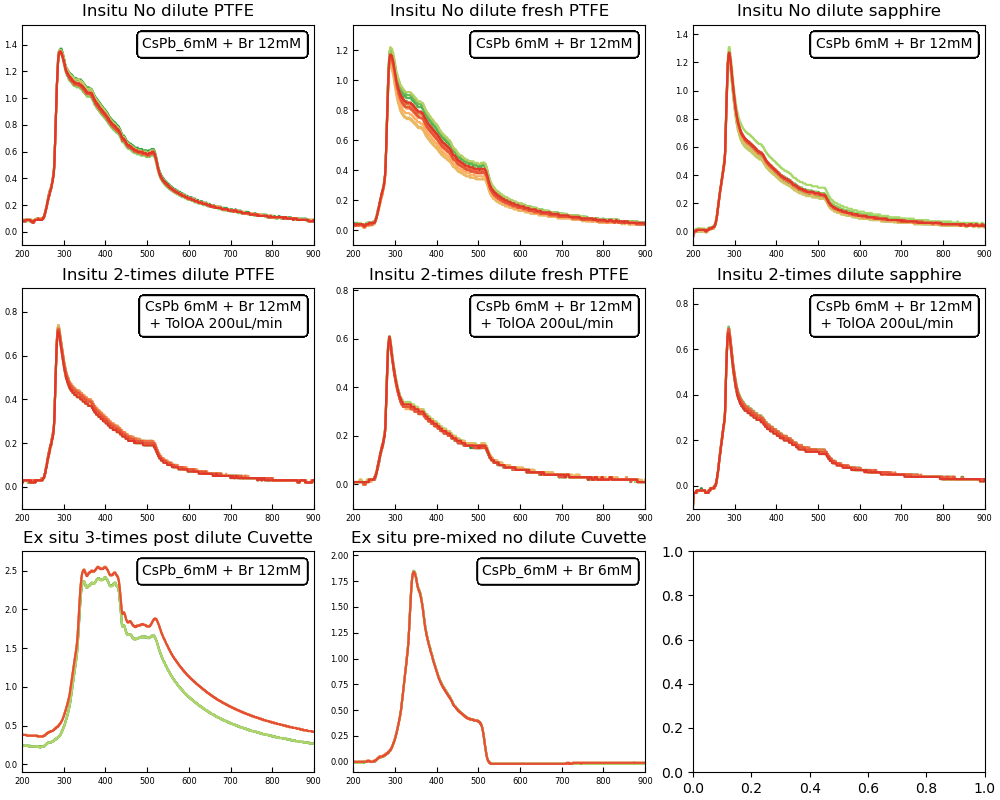

In [83]:
## Plot All PL profiles in each subfolder
f1, ax1 = plt.subplots(3, int(len(subfolder)/3)+1, figsize = (10, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 300
w2 = 650

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + '/**Absorbance**.txt')
    data_files.sort()
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    for j in range(k1, k2):
        df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        ax1[i].plot(df_j.wavelength, df_j.intensity, color=cmap(color_idx[j-k1]))
        ax1[i].set_xlim(200, 900)
        ax1[i].set_ylim(-0.1, max(df_j.intensity[100:800])+0.2)
        ax1[i].tick_params(axis='both', direction='in', labelsize=6)
        
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        
        #ax1[i].text(0.5,0.9,label[i], fontsize = 10, bbox = dict(boxstyle="round", alpha = 0.1), horizontalalignment='center', 
        #            verticalalignment='center', transform=ax1[i].transAxes)
        
        
        #df_i[f'Iten_{j}'] = df_j.intensity
        df_i = pd.concat([df_i, df_j.intensity], axis=1, ignore_index=True)
    
    df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
    #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
    df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    
    x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
df['wavelength'] = df_j.wavelength
df_norm['wavelength'] = df_j.wavelength.loc[w1:w2]
#df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
df_norm2.loc[0:w2-w1, 'wavelength'] = df_j.wavelength.loc[w1:w2].values

In [85]:
img_name = 'baseline_test_01.png'
plt.savefig(cwd + '/' + img_name, dpi = 300,  transparent=False)

In [49]:
df[210:215]

,01 CsPb_6mM_Br_12mM,02 CsPb_6mM_Br_12mM_newTube,03 CsPb_6mM_Br_12mM_sapphire,04 CsPb_6mM_Br_12mM_TolOA,05 CsPb_6mM_Br_12mM_TolOA_newTube,06 CsPb_6mM_Br_12mM_TolOA_sapphire,07 CsPbBr_5mL_TolOA_10mL,08 CsPb_6mM_Br_6mM_premix,wavelength
210,1.042667,0.772667,0.551333,0.387333,0.300667,0.294000,2.40000,1.575,363.367
211,1.041333,0.770667,0.548667,0.386000,0.300667,0.294000,2.40375,1.555,364.154
212,1.040667,0.769333,0.545333,0.384667,0.300667,0.291333,2.41000,1.535,364.942
213,1.038000,0.767333,0.542667,0.382667,0.298667,0.290000,2.41625,1.515,365.730
214,1.037333,0.766667,0.542667,0.381333,0.298000,0.289333,2.41750,1.495,366.518


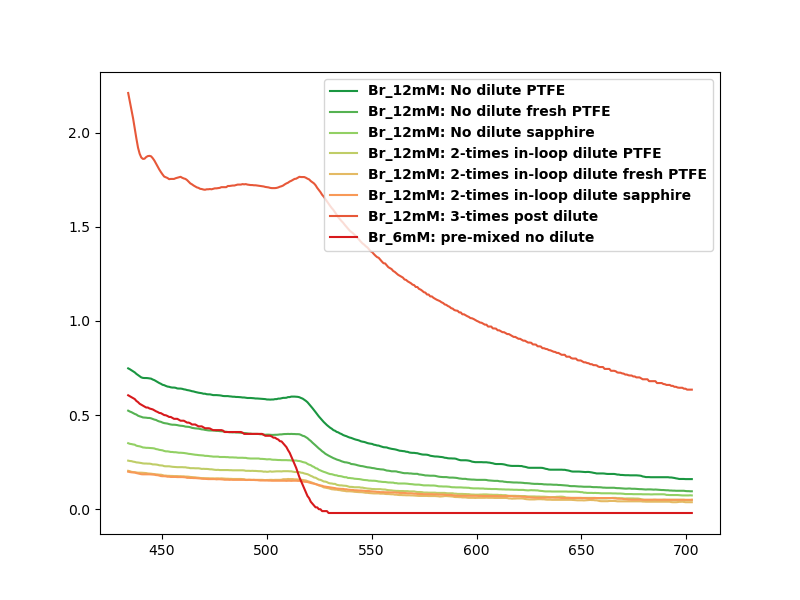

In [41]:
## Plot average absorption profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (8, 6))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax2.plot(df.wavelength.loc[w1:w2], getattr(df.loc[w1:w2], os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=title[i])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(fontsize=legendsize, prop=legend_properties)

In [35]:
## Fit PL peaks by 1 Gaussian distribution
## http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html
## https://en.wikipedia.org/wiki/Cauchy_distribution


def _1gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))


def _1Lorentz(x, A, x0, sigma):
    return A*sigma**2/((x-x0)**2+sigma**2)


def _1peak_fit_PL(x, y, distr='G', plot=False, plot_title=None, maxfev=100000):    
    # 'G': Guassian
    # 'L': Lorentz        
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    if distr == 'G':
        popt, pcov = curve_fit(_1gauss, x, y, p0=[max(y), mean, sigma], maxfev=maxfev)
    else:
        popt, pcov = curve_fit(_1Lorentz, x, y, p0=[max(y), mean, sigma], maxfev=maxfev)
    
    A = popt[0]
    x0 = popt[1]
    sigma = popt[2]
    
    if distr == 'G':
        fitted_result = _1gauss(x, *popt)
        fit_model = 'Gaussian'
    else:
        fitted_result = _1Lorentz(x, *popt)
        fit_model = 'Lorentz'
    
    #fitted_result = _1gauss(x, *popt)
    residulas = y - fitted_result
    ss_res = np.sum(residulas**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_2 = 1 - (ss_res / ss_tot)
    r2 = f'R\u00b2={r_2:.2f}'
    
    if plot == True:
        plt.figure()
        plt.plot(x,y,'b+:',label='data')
        plt.plot(x,fitted_result,'ro:',label='Total fit\n'+r2)
        plt.legend()
        plt.title(f'{fit_model} : {plot_title}')
        plt.show()
    else: pass
    
    return A, x0, sigma

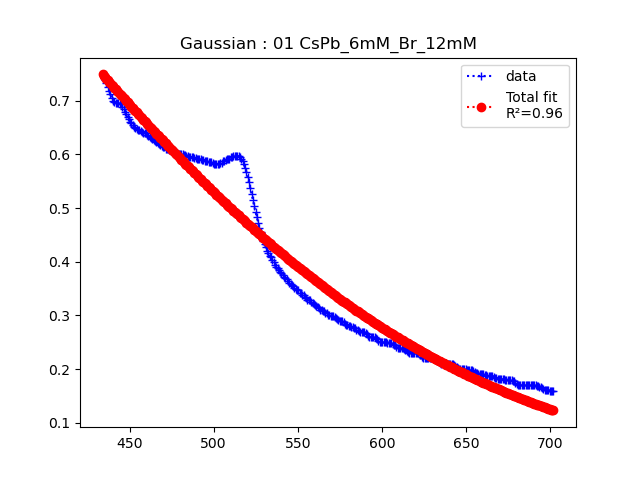

(1.587580199750969, 117.28778339892936, 258.4255193770214)

In [36]:
i = 0
x = df[w1:w2].wavelength
y = getattr(df[w1:w2], os.path.basename(subfolder[i]))
_1peak_fit_PL(x, y, plot=True, distr='G', plot_title=os.path.basename(subfolder[i]))

In [37]:
## Fit PL peaks by Multi Gaussian distributions
## http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html

def _2gauss(x, A1, x1, s1, A2, x2, s2):
    return (_1gauss(x, A1, x1, s1) +
            _1gauss(x, A2, x2, s2))


def _3gauss(x, A1, x1, s1, A2, x2, s2, A3, x3, s3):
    return (_1gauss(x, A1, x1, s1) +
            _1gauss(x, A2, x2, s2) + 
            _1gauss(x, A3, x3, s3))


def _2Lorentz(x, A1, x1, s1, A2, x2, s2):
    return (_1Lorentz(x, A1, x1, s1) +
            _1Lorentz(x, A2, x2, s2))


def _3Lorentz(x, A1, x1, s1, A2, x2, s2, A3, x3, s3):
    return (_1Lorentz(x, A1, x1, s1) +
            _1Lorentz(x, A2, x2, s2) +
            _1Lorentz(x, A3, x3, s3))


def _2peak_fit_PL(x, y, distr='G', height=930, plot=False, plot_title=None, second_peak=3, maxfev=100000):
    # 'G': Guassian
    # 'L': Lorentz  
    peaks, _ = find_peaks(y, height=height)
    if len(peaks) >2:
        raise IndexError('Number of peaks should be less than 2.')
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    
    if len(peaks) == 2:
        if distr == 'G':
            popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[-1]], x[peaks[-1]], sigma], maxfev=maxfev)
        else:
            popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[-1]], x[peaks[-1]], sigma], maxfev=maxfev)
    else:
        if distr == 'G':
            popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
        else:
            popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak*sigma), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
    #A = popt[0]
    #x0 = popt[1]
    #sigma = popt[2]
    
    pars_1 = popt[0:3]
    pars_2 = popt[3:6]
    
    if distr == 'G':
        peak_1 = _1gauss(x, *pars_1)
        peak_2 = _1gauss(x, *pars_2)
        fit_model = 'Gaussian'
    else:
        peak_1 = _1Lorentz(x, *pars_1)
        peak_2 = _1Lorentz(x, *pars_2)
        fit_model = 'Lorentz'
    
    fitted_result = _2gauss(x, *popt)
    residulas = y - fitted_result
    ss_res = np.sum(residulas**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_2 = 1 - (ss_res / ss_tot)
    r2 = f'R\u00b2={r_2:.2f}'
    
    if plot == True:
        plt.figure()
        plt.plot(x,y,'b+:',label='data')
        plt.plot(x,fitted_result,'ro:',label='Total fit\n'+r2)
        
        # peak 1
        plt.plot(x, peak_1, "g", label='peak 1')
        plt.fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)
  
        # peak 2
        plt.plot(x, peak_2, "y", label='peak 2')
        plt.fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)  
        
        plt.title(f'{fit_model} : {plot_title}')
        plt.legend()
        plt.show()
    else: pass
    
    return peaks, popt

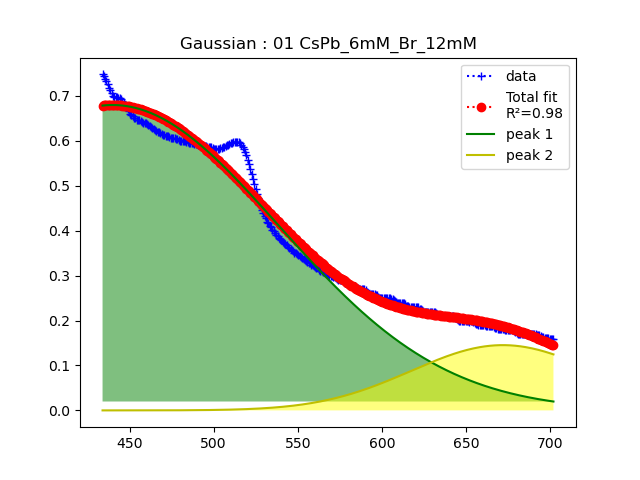

array([6.79873439e-01, 4.39951227e+02, 9.84697169e+01, 1.45321111e-01,
       6.71768199e+02, 5.43818453e+01])

In [38]:
i = 0
x = np.array(df[w1:w2].wavelength)
y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
#_2peak_fit_PL(x,y, distr='L', height=1000, second_peak=-.4, plot=True, plot_title=os.path.basename(subfolder[i]))
peaks, popt = _2peak_fit_PL(x,y, distr='G', height=0.1, second_peak=2, plot=True, plot_title=os.path.basename(subfolder[i]))
popt

IndexError: list index out of range

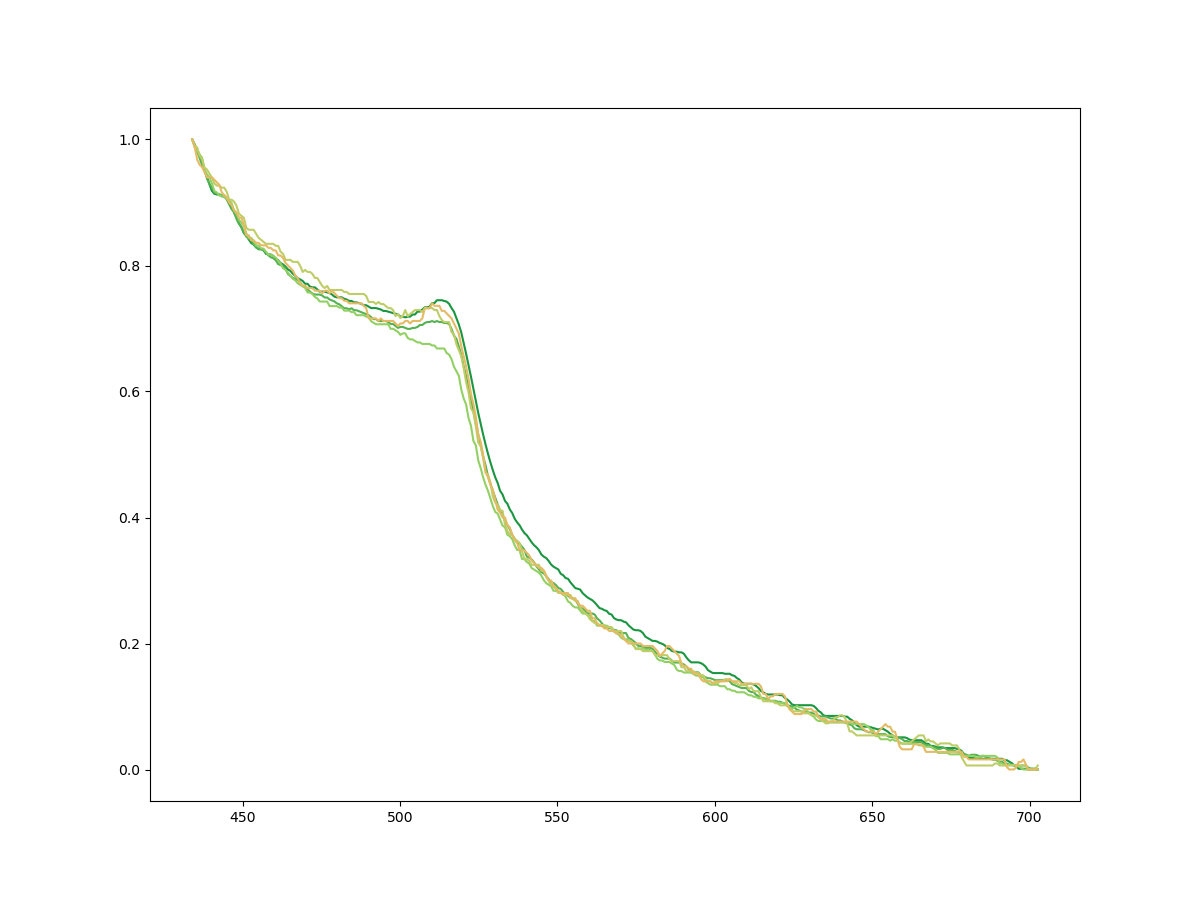

In [39]:
## Plot Normalized (by Max-min) PL profiles in each subfolder
f4, ax4 = plt.subplots(1, 1, figsize = (12, 9))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
label = ['CsPbBr', 'CsPbBr_I_08uL', 'CsPbBr_I_16uL', 'CsPbBr_I_32uL', 'CsPbBr_I_64uL']
k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax4.plot(df_norm2.wavelength, getattr(df_norm2, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':18}    
ax4.legend(prop=legend_properties)

ax4.set_xlim(400, 810)
ax4.set_xlabel('Wavelength (nm)', fontsize=labelsize, fontweight=fontweight)
ax4.set_ylabel('PL Intensity Norm.', fontsize=labelsize, fontweight=fontweight)

imag_name = '20220630_PL_CsPbBr_I.png'
#plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=False)